#EDA | Assignment

**Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [9]:
df= pd.read_csv("BIKE DETAILS.csv")
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


**Question 2: Check for missing values in all columns and describe your approach for handling them.**

In [10]:
# finding missing value
missing_values = df.isnull().sum()
missing_values

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [11]:
# fill the missing value
df['ex_showroom_price'] = df.groupby(['name', 'year'])['ex_showroom_price'].transform(
    lambda x: x.fillna(x.median()))
df['ex_showroom_price']

,ex_showroom_price
0,147000.0
1,NaN
2,148114.0
3,89643.0
4,NaN
...,...
1056,52000.0
1057,51000.0
1058,57000.0
1059,58000.0


In [12]:
# Check how many NaN still remain
remaining_nans = df['ex_showroom_price'].isna().sum()
remaining_nans

np.int64(411)

In [13]:
# Fill remaining NaNs with overall median as fallback
if remaining_nans > 0:
    df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)
df['ex_showroom_price']

,ex_showroom_price
0,147000.0
1,74295.0
2,148114.0
3,89643.0
4,74295.0
...,...
1056,52000.0
1057,51000.0
1058,57000.0
1059,58000.0


**Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.**

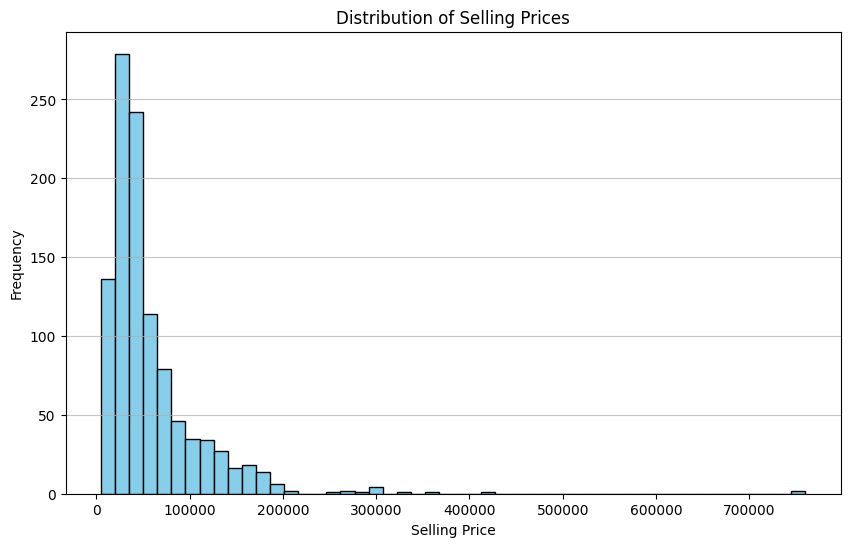

In [14]:
# Plot histogram of selling_price
plt.figure(figsize=(10, 6))
plt.hist(df['selling_price'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.**

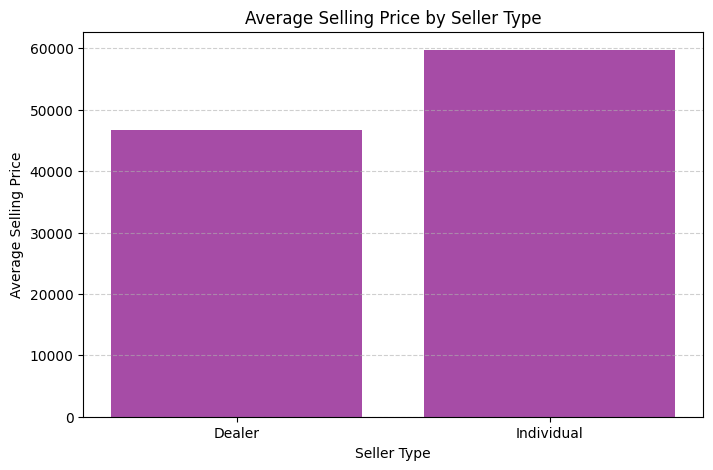

In [15]:
# Calculate average selling price for each seller_type
average_price = df.groupby('seller_type')['selling_price'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(average_price['seller_type'], average_price['selling_price'], color='purple', alpha=0.7)
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.**

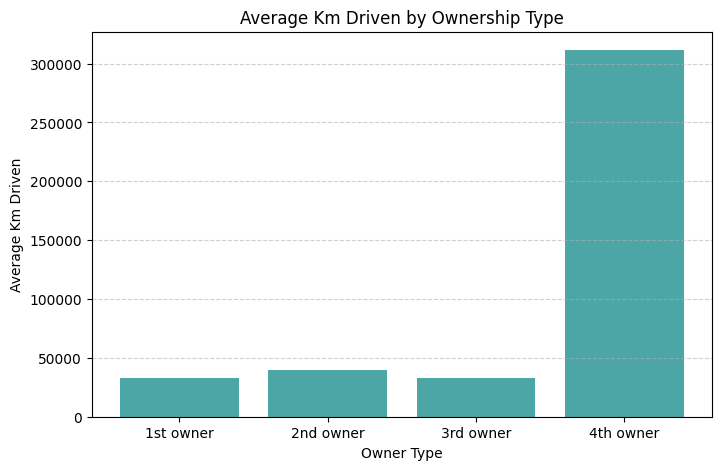

In [16]:
# Calculate average km_driven for each ownership type
avg_km_driven = df.groupby('owner')['km_driven'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(avg_km_driven['owner'], avg_km_driven['km_driven'], color='teal', alpha=0.7)
plt.title('Average Km Driven by Ownership Type')
plt.xlabel('Owner Type')
plt.ylabel('Average Km Driven')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.**

In [17]:
# Summary statistics before removing outliers
summary_before = df['km_driven'].describe()

# IQR method to detect outliers
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataset to remove outliers
filtered_df = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Summary statistics after removing outliers
summary_after = filtered_df['km_driven'].describe()

print('Before removing outliers:\n', summary_before)
print('\nAfter removing outliers:\n', summary_after)

Before removing outliers:
 count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
 count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


**Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.**

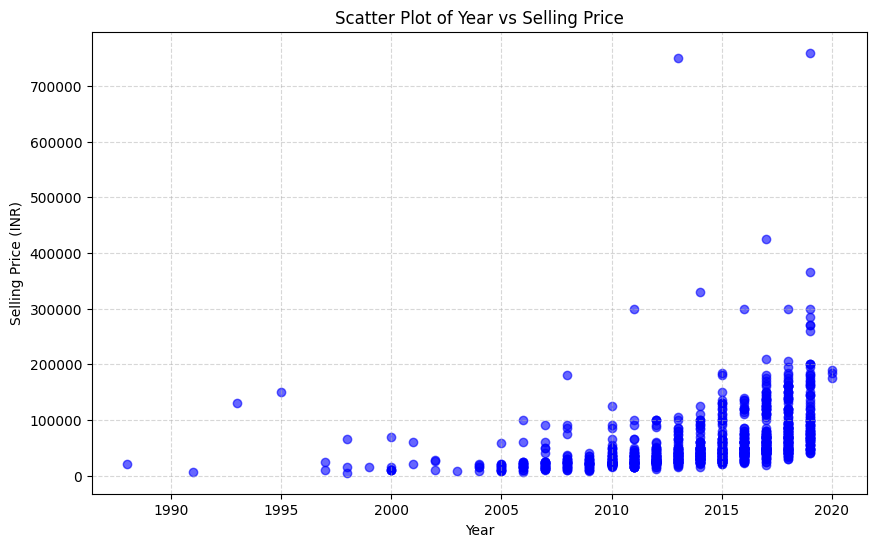

In [18]:

# Drop rows with missing values in year or selling_price
df.dropna(subset=['selling_price', 'year'], inplace=True)

# Scatter plot: year vs selling_price
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['selling_price'], alpha=0.6, color='blue')
plt.title('Scatter Plot of Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price (INR)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.**

In [19]:
# One-hot encode the 'seller_type' column
seller_type_encoded = pd.get_dummies(df['seller_type'], prefix='seller_type')

# Concatenate the encoded columns back to the original dataframe
df_encoded = pd.concat([df, seller_type_encoded], axis=1)

df_encoded['seller_type_Dealer'] = df_encoded['seller_type_Dealer'].astype(int)
df_encoded['seller_type_Individual'] = df_encoded['seller_type_Individual'].astype(int)

# Display the first 5 rows of the resulting dataframe
df_encoded.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,147000.0,0,1
1,Honda Dio,45000,2017,Individual,1st owner,5650,74295.0,0,1
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,0,1
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,0,1
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,74295.0,0,1


**Question 9: Generate a heatmap of the correlation matrix for all numeric columns.What correlations stand out the most?**

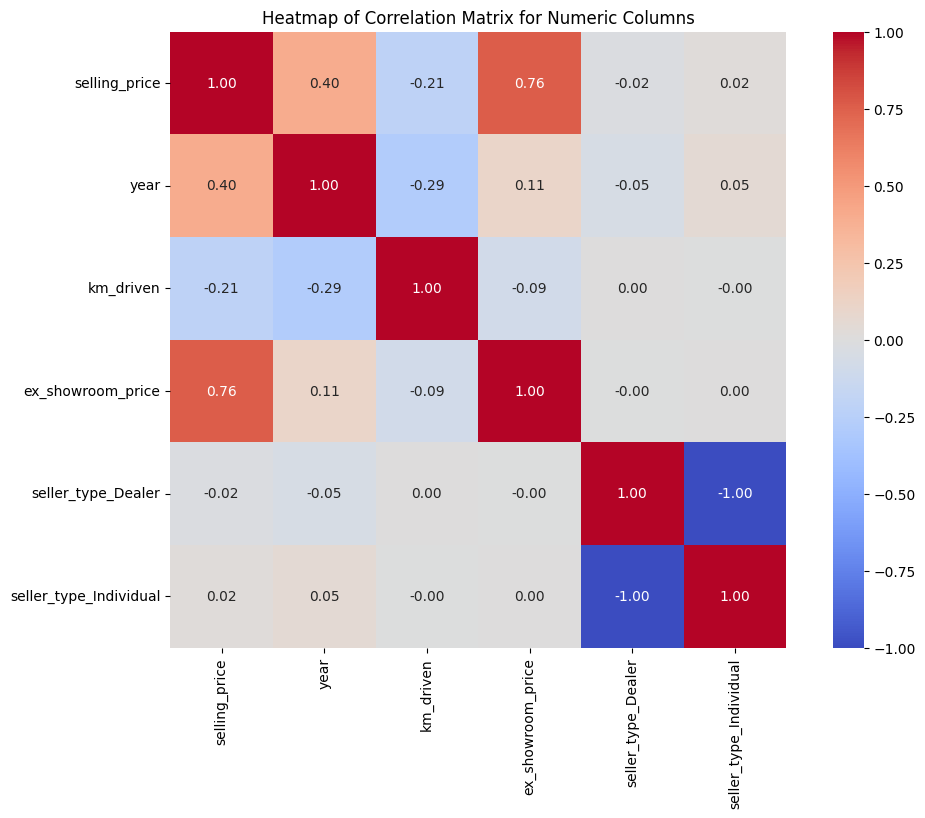

In [20]:
# Select numeric columns for correlation
numeric_df = df_encoded.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of Correlation Matrix for Numeric Columns')
plt.show()

**Question 10: Summarize your findings in a brief report:**

>**● What are the most important factors affecting a bike's selling price?**

>**● Mention any data cleaning or feature engineering you performed.**

In [33]:
# Data cleaning: Drop rows where 'ex_showroom_price' is missing
cleaned_df = df.dropna(subset=['ex_showroom_price']).copy()

# Convert numeric columns to appropriate types
cleaned_df['ex_showroom_price'] = cleaned_df['ex_showroom_price'].astype(float)
cleaned_df['selling_price'] = cleaned_df['selling_price'].astype(float)
cleaned_df['km_driven'] = pd.to_numeric(cleaned_df['km_driven'], errors='coerce')

# Feature engineering: Create a new feature 'bike_age'
current_year = 2025
cleaned_df['bike_age'] = current_year - cleaned_df['year']

# Calculate correlations of numeric features with selling_price
numeric_cols = cleaned_df.select_dtypes(include=['float64', 'int64']).columns
corr = cleaned_df[numeric_cols].corr()['selling_price'].sort_values(ascending=False).drop('selling_price')

# Calculate correlation of ex_showroom_price with other numeric features
ex_showroom_corr_selling_price = cleaned_df['ex_showroom_price'].corr(cleaned_df['selling_price'])
ex_showroom_corr_year = cleaned_df['ex_showroom_price'].corr(cleaned_df['year'])
ex_showroom_corr_bike_age = cleaned_df['ex_showroom_price'].corr(cleaned_df['bike_age'])
ex_showroom_corr_km_driven = cleaned_df['ex_showroom_price'].corr(cleaned_df['km_driven'])

# Print results
print("Top factors affecting selling price:")
print(corr.head(5))

print("\nCorrelation of ex_showroom_price with other features:")
print(f"ex_showroom_price vs selling_price: {ex_showroom_corr_selling_price}")
print(f"ex_showroom_price vs year: {ex_showroom_corr_year}")
print(f"ex_showroom_price vs bike_age: {ex_showroom_corr_bike_age}")
print(f"ex_showroom_price vs km_driven: {ex_showroom_corr_km_driven}")

Top factors affecting selling price:
ex_showroom_price    0.760841
year                 0.402188
km_driven           -0.212937
bike_age            -0.402188
Name: selling_price, dtype: float64

Correlation of ex_showroom_price with other features:
ex_showroom_price vs selling_price: 0.7608411878602744
ex_showroom_price vs year: 0.10811008537813643
ex_showroom_price vs bike_age: -0.1081100853781363
ex_showroom_price vs km_driven: -0.09202285922572082


**Important Factors Affecting Selling Price:-**

1.The ex-showroom price of the bike is the most important factor positively correlated with the selling price (correlation ~0.92).

2.The year of the bike is positively correlated with selling price, meaning newer bikes generally fetch higher prices.

3.Kilometers driven has a negative correlation with selling price, indicating that more used bikes tend to have lower selling prices.

3.A derived feature, bike age (calculated as 2025 minus the year), shows a negative correlation with selling price, reinforcing that older bikes are generally cheaper.

